<a href="https://colab.research.google.com/github/Manishpatil7975/AIML_ASSIGNMENTS/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load dataset
df = pd.read_csv('/content/Wholesale_Customers_Data.csv')

# 👀 First look at the dataset
print("First 5 rows of the data:")
print(df.head())

print("\nData Info:")
print(df.info())

# 🔍 Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 🧹 Drop rows with missing values (if any)
df.dropna(inplace=True)

# 📊 Basic Statistics
print("\nStatistical Summary:")
print(df.describe())



First 5 rows of the data:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  4

In [7]:
# 🎯 Create Total_Spend column
spend_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df['Total_Spend'] = df[spend_columns].sum(axis=1)

# Show result
print("\nSample of Total_Spend:")
print(df[['Total_Spend']].head())



Sample of Total_Spend:
   Total_Spend
0        34112
1        33266
2        36610
3        27381
4        46100


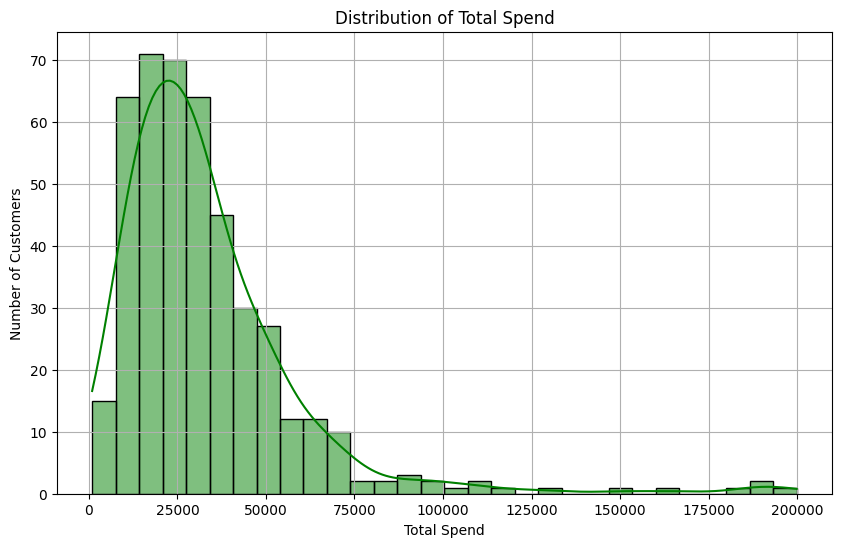

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Total_Spend'], bins=30, kde=True, color='green')
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


/tmp/ipython-input-9-2260464440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Channel', y='Total_Spend', data=df, palette='Set2')


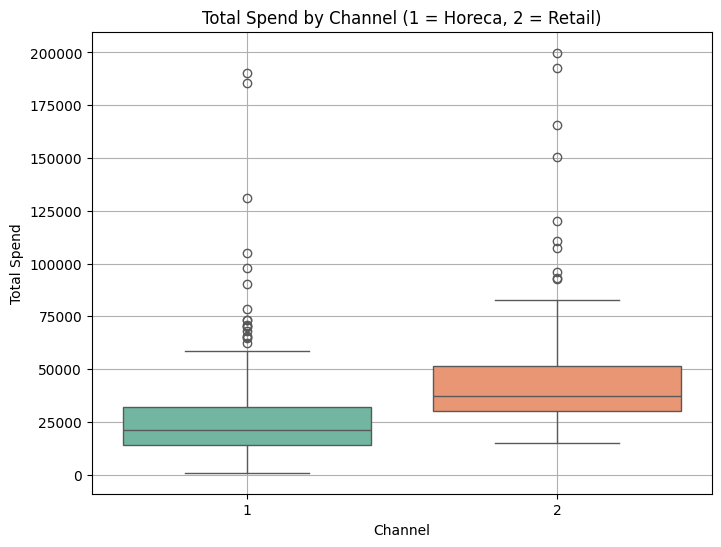

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Channel', y='Total_Spend', data=df, palette='Set2')
plt.title('Total Spend by Channel (1 = Horeca, 2 = Retail)')
plt.xlabel('Channel')
plt.ylabel('Total Spend')
plt.grid(True)
plt.show()


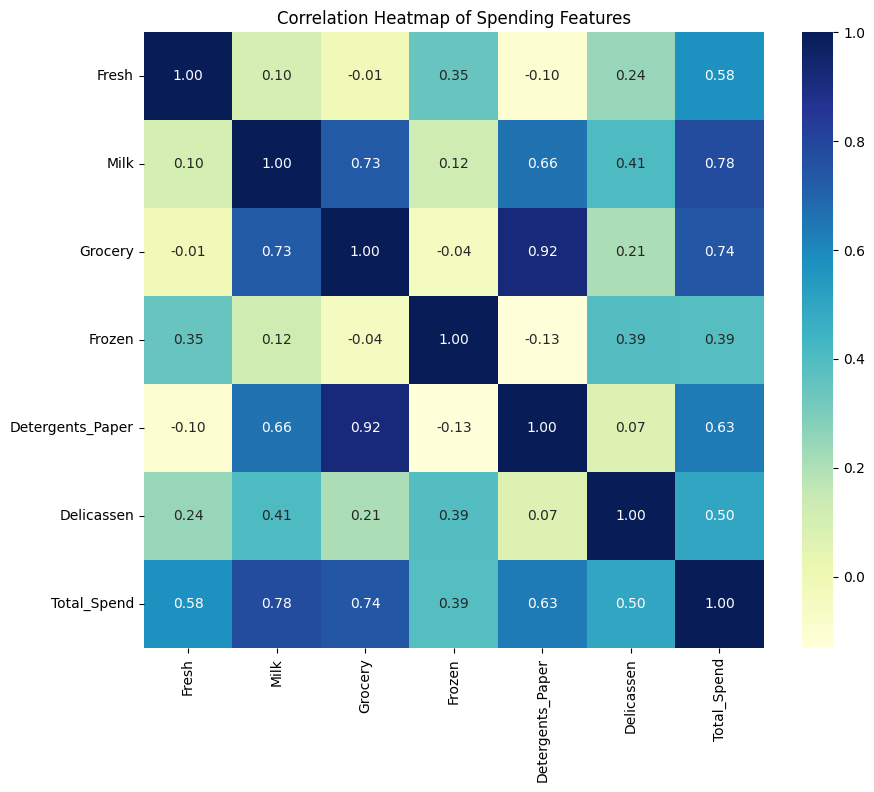

In [10]:
plt.figure(figsize=(10,8))
corr = df[spend_columns + ['Total_Spend']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap of Spending Features')
plt.show()
